![teks alternatif](https://drive.google.com/uc?id=1IXpcB3npQHTVFIcaC84dW-EHAOPJxCcG)

#COVID-19 MULTIVARIATE TIME SERIES FORECASTING USING TENSOR FLOW

##1. Dataset

Data on this project are time series data on the number of COVID-19 patients in Indonesia, both positive confirmed data, died and cured. Data obtained from https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data#.

Fitur Data: 
1. Country
2. Province
3. Confirmed
4. Death
5. Recovered

The amount of data:
66

Date Data Taken:
29 March 2020

##2. Framing & Hypothesis
###Framing
In this project we are trying to form a time series model to model the growth of COVID-19 data in Indonesia. Then predictions are made to help the government understand the spread or growth of COVID-19 in Indonesia. 
###Hypothesis
Using time series data in the past we can build a time series model and then predict some values in the future.
###ML Type
Forecasting

##3. Modeling
###A. Data Preparation

In [1]:
!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 109.2MB 95kB/s 
     |████████████████████████████████| 491kB 42.6MB/s 
     |████████████████████████████████| 3.2MB 46.0MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow 2.2.0rc1
    Uninstalling tensorflow-2.2.0rc1:
      Successfully uninstalled tensorflow-2.2.0rc1


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


In [0]:
#Activating the Library needed in modeling
from numpy import array
from matplotlib import pyplot as plt
import pandas as pd 
import tensorflow as tf
import io
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from google.colab import files

In [105]:
#Import Data
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving time_series_covid_19_confirmed.csv to time_series_covid_19_confirmed (1).csv
User uploaded file "time_series_covid_19_confirmed.csv" with length 48844 bytes


In [142]:
df=pd.read_csv(io.StringIO(uploaded['time_series_covid_19_confirmed.csv'].decode('utf-8')))
#Data Selection
df1=df.iloc[132,:]
df=np.array(df1)
index=[0,1,2,3]
IndConf=np.delete(df,index)
jumlah=len(IndConf)
print('COVID-19 Record Data Number')
print(jumlah)

COVID-19 Record Data Number
66


In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return X,y

In [0]:
raw_seq = []
for i in range(len(IndConf)):
  raw_seq.append(IndConf[i])

In [145]:
print(raw_seq)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 4, 6, 19, 27, 34, 34, 69, 96, 117, 134, 172, 227, 311, 369, 450, 514, 579, 686, 790, 893, 1046]


In [0]:
#Daily increase
kenaikan = []
for i in range(len(IndConf)-1):
  kenaikan.append(IndConf[i+1]-IndConf[i])

No handles with labels found to put in legend.


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 13, 8, 7, 0, 35, 27, 21, 17, 38, 55, 84, 58, 81, 64, 65, 107, 104, 103, 153]


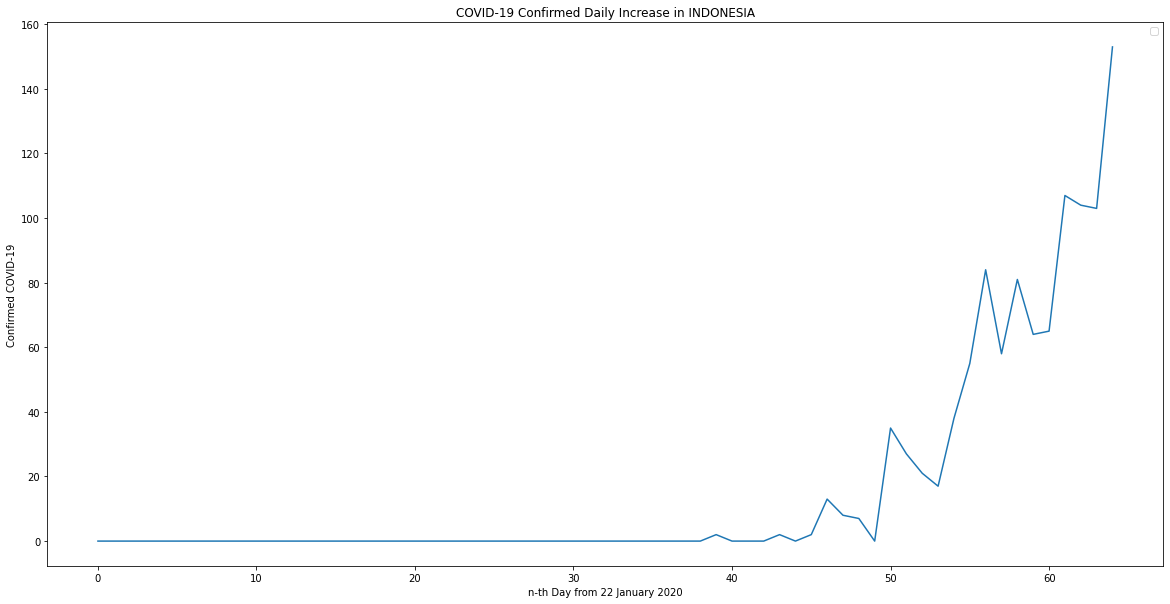

In [147]:
print(kenaikan)
plt.figure(figsize=(20,10))
plt.plot(kenaikan)
plt.legend()
plt.xlabel('n-th Day from 22 January 2020')
plt.ylabel('Confirmed COVID-19')
plt.title('COVID-19 Confirmed Daily Increase in INDONESIA')
plt.show()

In [0]:
# choose a number of time steps
n_steps_in, n_steps_out = 20, 7

In [0]:
# split into samples
#X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
X, y = split_sequence(kenaikan, n_steps_in, n_steps_out)
X=np.array(X)
y=np.array(y)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
#print(X)
#print(y)

##B. Multivariate Forecasting with Bidirectional Model

In [0]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [151]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [152]:
# demonstrate prediction
x_input = array(kenaikan[45:65])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)
#print(kenaikan[54:62])

[[132.19386  73.61789 281.93964 451.87167 346.3803  239.49464 439.97845]]


Based on this graphic, we nkow that, the number of COVID-19 in Indonesia have a positif trend.

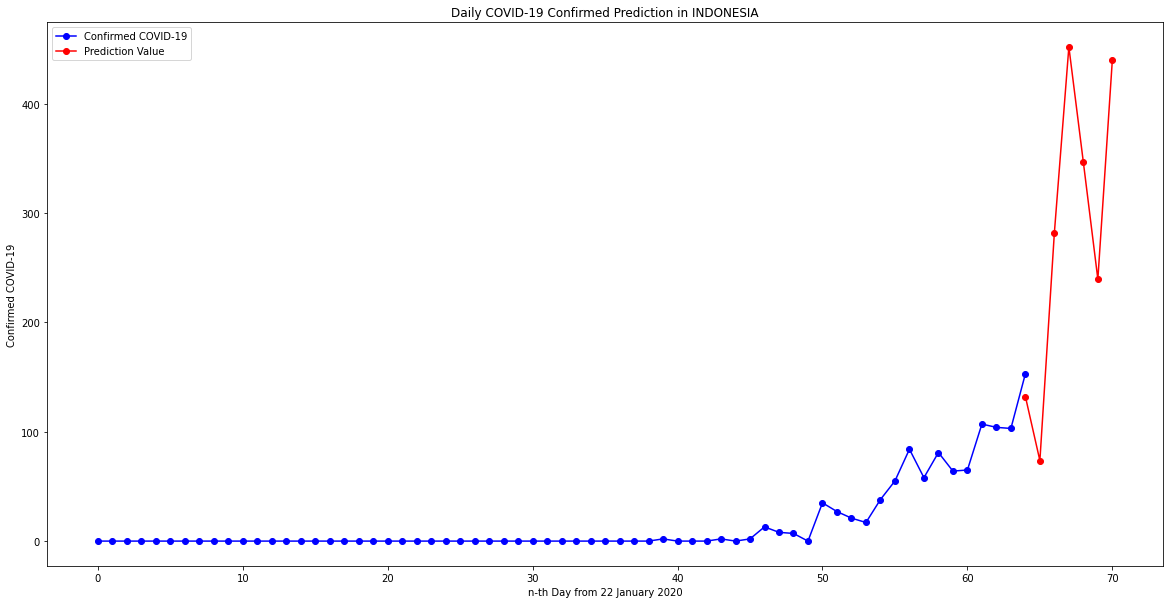

In [158]:
plt.figure(figsize=(20,10))
plt.plot(kenaikan, 'b-o', label='Confirmed COVID-19')
x=[64,65,66,67,68,69,70]
y=np.array(yhat[0])
plt.plot(x,y, 'r-o' ,label='Prediction Value')
plt.legend()
plt.xlabel('n-th Day from 22 January 2020')
plt.ylabel('Confirmed COVID-19')
plt.title('Daily COVID-19 Confirmed Prediction in INDONESIA')
plt.show()


Based on the picture above, the model is close enough to the actual value for some values produced.